# Pandas intro class 04

Objective:
- Understand and learn Exploratory Data Analysis (EDA)
- Data visulization 101


## EDA recommended steps

Data inspection - Data cleaning - Data wrangling - Data visualization

- inspect all datasets and metadata definition
- understand data types
- understand/ask the right question
- check for missing values, take appropriate action
- check for duplicates, take appropriate action
- check data distribution (outliers, anormaly values, check assumption, etc.)
- check correlation (with target variable, or multicolinearity in inputs)
- take care of outliers and generate transformations if needed
- data wrangling for your problem
- feature engineering
- visualization (along the way of all steps above)
#### Advanced topics:
- sampling: random, up-sample, down-sample
- bi-variate / multi-variate views
- time series

## Data visulization 101

Some common tools:
- `matplotlib`: https://matplotlib.org/gallery/index.html
- `seaborn`: https://seaborn.pydata.org/
- `pandas` also have lots of built-in methods: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization
- `plotly`: https://plotly.com/python/getting-started/?utm_source=mailchimp-jan-2015&utm_medium=email&utm_campaign=generalemail-jan2015&utm_term=bubble-chart

Some commonly used plots:
- Overall data distribution:
    - Histogram or Kernel Density plot (continuous variable) / Frequency table bar plot (categorical variable)
    - Boxplot / Swampplot / Violinplot
    - Missing in data, add missing as a special group and check
- Bi-variate views:
    - Categorical x Categorical: contigency table heatmap
    - Categorical x Continuous: histogram/density/boxplot/violinplot etc. by Categorical groups
    - Continuous x Continuous: Scatterplot/joint density plot
- Correlation:
    - Scatterplot of variable pairs
    - Correlation matrix heatmap
- Multi-variate views: usually matrix with pairwise bi-variate views
- Time series:
    - Line graph with timestamp on x-axis
    - Autocorrelation plot ~ lags/seasonality
    - Univariate view using raw timestamp / aggregated time period as group

In [ ]:
# install packages required in this class in your virtual env
! conda install matplotlib seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

%matplotlib inline

## Recommended resourse: [Data EDA cheat-sheet](https://github.com/cmawer/pycon-2017-eda-tutorial/blob/master/EDA-cheat-sheet.md)

### What are key steps?
[The Plan](https://github.com/cmawer/pycon-2017-eda-tutorial/blob/master/EDA-cheat-sheet.md#the-plan) is a good outline of major steps:

>1. Form hypotheses/develop investigation themes to explore 
2. Wrangle data 
3. Assess quality of data 
4. Profile data 
5. Explore each individual variable in the dataset 
6. Assess the relationship between each variable and the target 
7. Assess interactions between variables 
8. Explore data across many dimensions 

Depending on 

### What should you do in addition to looking at the data/plotting?
Throughout the entire analysis you want to:

>- Capture a list of hypotheses and questions that come up for further exploration.
- Record things to watch out for/ be aware of in future analyses.
- Show intermediate results to colleagues to get a fresh perspective, feedback, domain knowledge. Don't do EDA in a bubble! Get feedback throughout especially from people removed from the problem and/or with relevant domain knowledge.
- Position visuals and results together. EDA relies on your natural pattern recognition abilities so maximize what you'll find by putting visualizations and results in close proximity.

### Another cheat-sheet in image format:
![img](https://www.analyticsvidhya.com/wp-content/uploads/2015/06/infographics-final.jpg)

## EDA example: World Happiness Data
https://www.kaggle.com/unsdsn/world-happiness

- Relatively smalle dataset for exploration
- Easy to explore with lots of flexibility
- Dystopis: https://worldhappiness.report/faq/#what-is-dystopia

### 1. Form hypotheses/develop investigation themes to explore

I'm interested in learing the temporal trend of happiness over the years and what's driving the change.

### 2. Wrangle data

I need to process and combine multiple datasets into a `tidy` dataset for easier analysis.

In [345]:
# year = 2015
# f'data/world-happiness/{year}.csv'
# 'data/world-happiness/{year}.csv'.format(**vars())

'data/world-happiness/2015.csv'

In [293]:
# check columns available in different years' data
for year in range(2015, 2020):
    # use formatted string
    df = pd.read_csv(f'data/world-happiness/{year}.csv')
    print(year, len(df.columns), df.columns)

2015 12 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 13 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 12 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 9 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Health

In [295]:
# I decided to rename the common columns in the data
# so I can merge different datasets for multiple years
rename_dict = {'Overall rank':'Rank',
               'Happiness Rank':'Rank',
               'Happiness.Rank':'Rank',
               'Happiness Score':'Score',
               'Happiness.Score':'Score',
               'Country or region':'Country',
               'Economy..GDP.per.Capita.':'GDP_PC',
               'GDP per capita':'GDP_PC',
               'Economy (GDP per Capita)':'GDP_PC',
               'Social support':'Family',
               'Health (Life Expectancy)':'Health',
               'Healthy life expectancy':'Health',
               'Health..Life.Expectancy.':'Health',
               'Freedom to make life choices':'Freedom',
               'Trust (Government Corruption)':'Trust',
               'Trust..Government.Corruption.':'Trust',
               'Perceptions of corruption':'Trust',
               'Dystopia Residual':'Dystopia',
               'Dystopia.Residual':'Dystopia'
              }

In [427]:
# read in all different years of data
# each country each year - observation
df_list = []

for year in range(2015, 2020):
    df = pd.read_csv(f'data/world-happiness/{year}.csv')
    # formatted string ==
    # 'data/world-happiness/{}.csv'.format(year)
    df.rename(columns=rename_dict, inplace=True)
    df['year'] = int(year)
    df_list.append(df)
df_all = pd.concat(df_list)

### 3. Assess quality of data 

Check data types, missing, duplicates, unique value, etc.

In [428]:
# sort by unique identifiers for each row
# since I'm combining multiple years, [country, year] uniquely define a record

df_all.sort_values(['Country','year'], inplace=True)
df_all.groupby('year')['Country'].count()

year
2015    158
2016    157
2017    155
2018    156
2019    156
Name: Country, dtype: int64

Here we know the totaly number of countrys in survey in different years are similar. We can generate a table for better understanding.

In [429]:
year_availability = df_all.groupby(['Country','year'])['Country'].size().unstack()
year_availability[year_availability.isnull().any(axis=1)]

year,2015,2016,2017,2018,2019
Country,,,,,
Angola,1.0,1.0,1.0,1.0,NaN
Belize,NaN,1.0,1.0,1.0,NaN
Central African Republic,1.0,NaN,1.0,1.0,1.0
Comoros,1.0,1.0,NaN,NaN,1.0
Djibouti,1.0,NaN,NaN,NaN,NaN
Gambia,NaN,NaN,NaN,NaN,1.0
Hong Kong,1.0,1.0,NaN,1.0,1.0
"Hong Kong S.A.R., China",NaN,NaN,1.0,NaN,NaN
Laos,1.0,1.0,NaN,1.0,1.0


Here we see some countries/regions are missing in certain years simply due to inconsistency in names. We can take care of this by creating a manual rename dict again. 

You can also do some simple regular expression to help extract and combine information if there are too many names to change. 

Judgement needs to be applied, also, the key is to make sure you're not introducint bias or human error into your data.

In [430]:
country_dict = {
    'Hong Kong S.A.R., China':'Hong Kong',
    'Northern Cyprus':'North Cyprus',
    'North Macedonia':'Macedonia',
    'Somaliland region':'Somaliland Region',
    'Taiwan Province of China':'Taiwan',
    'Trinidad & Tobago':'Trinidad and Tobago'
}

In [431]:
df_all['Country_mapped'] = df_all['Country'].map(country_dict).fillna(df_all['Country'])

In [432]:
year_availability = df_all.groupby(['Country_mapped','year'])['Country_mapped'].size().unstack()
year_availability[year_availability.isnull().any(axis=1)]

year,2015,2016,2017,2018,2019
Country_mapped,,,,,
Angola,1.0,1.0,1.0,1.0,NaN
Belize,NaN,1.0,1.0,1.0,NaN
Central African Republic,1.0,NaN,1.0,1.0,1.0
Comoros,1.0,1.0,NaN,NaN,1.0
Djibouti,1.0,NaN,NaN,NaN,NaN
Gambia,NaN,NaN,NaN,NaN,1.0
Laos,1.0,1.0,NaN,1.0,1.0
Lesotho,1.0,NaN,1.0,1.0,1.0
Mozambique,1.0,NaN,1.0,1.0,1.0


In [327]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 152 to 145
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    782 non-null    object 
 1   Region                     779 non-null    object 
 2   Rank                       782 non-null    int64  
 3   Score                      782 non-null    float64
 4   Standard Error             158 non-null    float64
 5   GDP_PC                     782 non-null    float64
 6   Family                     782 non-null    float64
 7   Health                     782 non-null    float64
 8   Freedom                    782 non-null    float64
 9   Trust                      781 non-null    float64
 10  Generosity                 782 non-null    float64
 11  Dystopia                   470 non-null    float64
 12  year                       782 non-null    int64  
 13  Lower Confidence Interval  157 non-null    float

In [433]:
df_all.isna().mean()

Country                      0.000000
Region                       0.597187
Rank                         0.000000
Score                        0.000000
Standard Error               0.797954
GDP_PC                       0.000000
Family                       0.000000
Health                       0.000000
Freedom                      0.000000
Trust                        0.001279
Generosity                   0.000000
Dystopia                     0.398977
year                         0.000000
Lower Confidence Interval    0.799233
Upper Confidence Interval    0.799233
Whisker.high                 0.801790
Whisker.low                  0.801790
Country_mapped               0.000000
dtype: float64

In [434]:
df_all.head()

,Country,Region,Rank,Score,Standard Error,GDP_PC,Family,Health,Freedom,Trust,Generosity,Dystopia,year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Country_mapped
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100,2015,NaN,NaN,NaN,NaN,Afghanistan
153,Afghanistan,Southern Asia,154,3.360,NaN,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580,2016,3.288,3.432,NaN,NaN,Afghanistan
140,Afghanistan,NaN,141,3.794,NaN,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801,2017,NaN,NaN,3.873661,3.714338,Afghanistan
144,Afghanistan,NaN,145,3.632,NaN,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN,2018,NaN,NaN,NaN,NaN,Afghanistan
153,Afghanistan,NaN,154,3.203,NaN,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN,2019,NaN,NaN,NaN,NaN,Afghanistan


Here we noticed `Region` is missing for 2017-2019 datasets. We can build a Country-Region mapping to fill in `Region` missing values for better analysis/

In [435]:
# read in datasets with region
df_2015 = pd.read_csv('data/world-happiness/2015.csv')
df_2016 = pd.read_csv('data/world-happiness/2016.csv')

# or you can subset these rows from the combined dataset

In [436]:
# get country-region mapping dict
region_2015 = dict(zip(df_2015['Country'], df_2015['Region']))

# alternative way to get mapping dict
# region_dict2 = df[['Country','Region']].set_index('Country').T.to_dict('records')[0]
# region_2015 == region_dict2
region_2016 = dict(zip(df_2016['Country'], df_2016['Region']))

# combine two year's mapping dictionary
region = {**region_2015, **region_dict_2016}

# alternative way to combine dicts
# region_dict2 = region_2015.copy()
# region_dict2.update(region_2016)
# region == region_dict2

In [437]:
# fill regions based on country
df_all['Region'] = df_all['Country'].map(region).fillna(df_all['Country_mapped'].map(region))

In [438]:
# check missing values for region
df_all[df_all['Region'].isna()]

,Country,Region,Rank,Score,Standard Error,GDP_PC,Family,Health,Freedom,Trust,Generosity,Dystopia,year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Country_mapped
119,Gambia,NaN,120,4.516,NaN,0.308,0.939,0.428,0.382,0.167,0.269,NaN,2019,NaN,NaN,NaN,NaN,Gambia


In [439]:
# check if this contry showed up in other years
df_all[df_all['Country_mapped']=='Gambia']

,Country,Region,Rank,Score,Standard Error,GDP_PC,Family,Health,Freedom,Trust,Generosity,Dystopia,year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Country_mapped
119,Gambia,NaN,120,4.516,NaN,0.308,0.939,0.428,0.382,0.167,0.269,NaN,2019,NaN,NaN,NaN,NaN,Gambia


In [440]:
# check regions frequency
df_all['Region'].value_counts()

Sub-Saharan Africa                 195
Central and Eastern Europe         145
Latin America and Caribbean        111
Western Europe                     105
Middle East and Northern Africa     96
Southeastern Asia                   44
Southern Asia                       35
Eastern Asia                        30
Australia and New Zealand           10
North America                       10
Name: Region, dtype: int64

In [441]:
# save processed data
cols_to_keep = ['Country_mapped', 'Region', 'year', 
                'Rank', 'Score', 'GDP_PC', 'Family', 'Health',
                'Freedom', 'Trust', 'Generosity', 'Dystopia']
df_all_final = df_all[cols_to_keep].copy()
df_all_final.columns = df_all_final.columns.str.lower()
df_all_final.to_csv('data/world-happiness/combined.csv', index=False)

### 4. Profile data
Understand data representation.

[pandas-profiling](https://pypi.org/project/pandas-profiling/#installation) can be a helpful tool to generate quick report.

In [ ]:
! conda install -c conda-forge pandas-profiling

In [4]:
import pandas as pd
from pandas_profiling import ProfileReport

In [5]:
df_all_final = pd.read_csv('data/world-happiness/combined.csv')

In [6]:
df_all_final.shape

(782, 12)

In [8]:
profile = ProfileReport(df_all_final, title='Pandas Profiling Report', 
                        html={'style':{'full_width':True}})

In [9]:
# explore report in notebook
profile.to_widgets()
# save report
profile.to_file("happiness.html")

In [351]:
# take some sample data for inspection
df_all_final[df_all_final['country'].isin(['China','United States'])]

,country,country_mapped,region,year,rank,score,gdp_pc,family,health,freedom,trust,generosity,dystopia
83,China,China,Eastern Asia,2015,84,5.140,0.890120,0.946750,0.816580,0.516970,0.027810,0.081850,1.860400
82,China,China,Eastern Asia,2016,83,5.245,1.027800,0.793810,0.735610,0.440120,0.027450,0.049590,2.170870
78,China,China,Eastern Asia,2017,79,5.273,1.081166,1.160837,0.741416,0.472788,0.022794,0.028807,1.764939
85,China,China,Eastern Asia,2018,86,5.246,0.989000,1.142000,0.799000,0.597000,0.103000,0.029000,NaN
92,China,China,Eastern Asia,2019,93,5.191,1.029000,1.125000,0.893000,0.521000,0.100000,0.058000,NaN
14,United States,United States,North America,2015,15,7.119,1.394510,1.247110,0.861790,0.546040,0.158900,0.401050,2.510110
12,United States,United States,North America,2016,13,7.104,1.507960,1.047820,0.779000,0.481630,0.148680,0.410770,2.727820
13,United States,United States,North America,2017,14,6.993,1.546259,1.419921,0.774287,0.505741,0.135639,0.392579,2.218113
17,United States,United States,North America,2018,18,6.886,1.398000,1.471000,0.819000,0.547000,0.133000,0.291000,NaN
18,United States,United States,North America,2019,19,6.892,1.433000,1.457000,0.874000,0.454000,0.128000,0.280000,NaN


### 5. Explore each individual variable in the dataset

Here I took one year (2019) of data for some simple exploration. Here I'm grouping by `Region` for a bit more comparison.

In [8]:
features = ['gdp_pc','family','health','freedom','generosity','trust']
targets = ['score']

df_2019 = df_all_final[df_all_final['year']==2019].copy()

In [9]:
df_2019[df_2019['region'].isna()]

,country_mapped,region,year,rank,score,gdp_pc,family,health,freedom,trust,generosity,dystopia
235,Gambia,NaN,2019,120,4.516,0.308,0.939,0.428,0.382,0.167,0.269,NaN


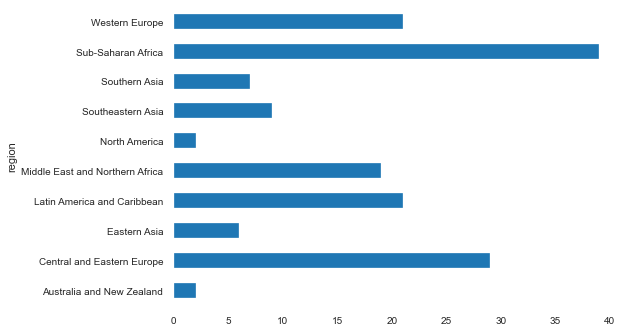

In [10]:
# since I'm grouping by Region, I'd like to know the sample size for each group
df_2019.groupby('region')['country_mapped'].count().plot(kind='barh')

In [364]:
# simple describe
df_2019.groupby('region')[features+targets].describe().T

region            Australia and New Zealand  Central and Eastern Europe  \
gdp_pc     count                   2.000000                   29.000000   
           mean                    1.337500                    1.021069   
           std                     0.048790                    0.212287   
           min                     1.303000                    0.493000   
           25%                     1.320250                    0.886000   
           50%                     1.337500                    1.052000   
           75%                     1.354750                    1.187000   
           max                     1.372000                    1.269000   
family     count                   2.000000                   29.000000   
           mean                    1.552500                    1.338793   
           std                     0.006364                    0.213351   
           min                     1.548000                    0.666000   
           25%                     1.550250                    1.232000   
           50%                     1.552500                    1.410000   
           75%                     1.554750                    1.504000   
           max                     1.557000                    1.538000   
health     count                   2.000000                   29.000000   
           mean                    1.031000                    0.809517   
           std                     0.007071                    0.071875   
           min                     1.026000                    0.657000   
           25%                     1.028500                    0.752000   
           50%                     1.031000                    0.815000   
           75%                     1.033500                    0.871000   
           max                     1.036000                    0.953000   
freedom    count                   2.000000                   29.000000   
           mean                    0.571000                    0.357517   
           std                     0.019799                    0.116852   
           min                     0.557000                    0.178000   
           25%                     0.564000                    0.282000   
           50%                     0.571000                    0.345000   
           75%                     0.578000                    0.457000   
           max                     0.585000                    0.631000   
generosity count                   2.000000                   29.000000   
           mean                    0.331000                    0.142724   
           std                     0.001414                    0.079772   
           min                     0.330000                    0.035000   
           25%                     0.330500                    0.082000   
           50%                     0.331000                    0.121000   
           75%                     0.331500                    0.185000   
           max                     0.332000                    0.322000   
trust      count                   2.000000                   29.000000   
           mean                    0.335000                    0.061759   
           std                     0.063640                    0.063646   
           min                     0.290000                    0.000000   
           25%                     0.312500                    0.020000   
           50%                     0.335000                    0.036000   
           75%                     0.357500                    0.080000   
           max                     0.380000                    0.240000   
score      count                   2.000000                   29.000000   
           mean                    7.267500                    5.561517   
           std                     0.055861                    0.583261   
           min                     7.228000                    4.332000   
           25%           

In [11]:
df_means = df_2019.groupby('region')[features+targets].mean()
df_means

,gdp_pc,family,health,freedom,generosity,trust,score
region,,,,,,,
Australia and New Zealand,1.337500,1.552500,1.031000,0.571000,0.331000,0.335000,7.267500
Central and Eastern Europe,1.021069,1.338793,0.809517,0.357517,0.142724,0.061759,5.561517
Eastern Asia,1.235167,1.333500,0.953333,0.372167,0.172833,0.119667,5.688833
Latin America and Caribbean,0.924286,1.339714,0.811857,0.440905,0.144619,0.072048,5.954429
Middle East and Northern Africa,1.059053,1.148684,0.751053,0.317947,0.153474,0.105000,5.237000
North America,1.399000,1.481000,0.956500,0.519000,0.282500,0.218000,7.085000
Southeastern Asia,0.930000,1.246444,0.745333,0.543778,0.301778,0.123444,5.273667
Southern Asia,0.650286,0.986857,0.617000,0.386286,0.234714,0.093429,4.526857
Sub-Saharan Africa,0.447231,0.916103,0.407026,0.336205,0.185641,0.092641,4.294513


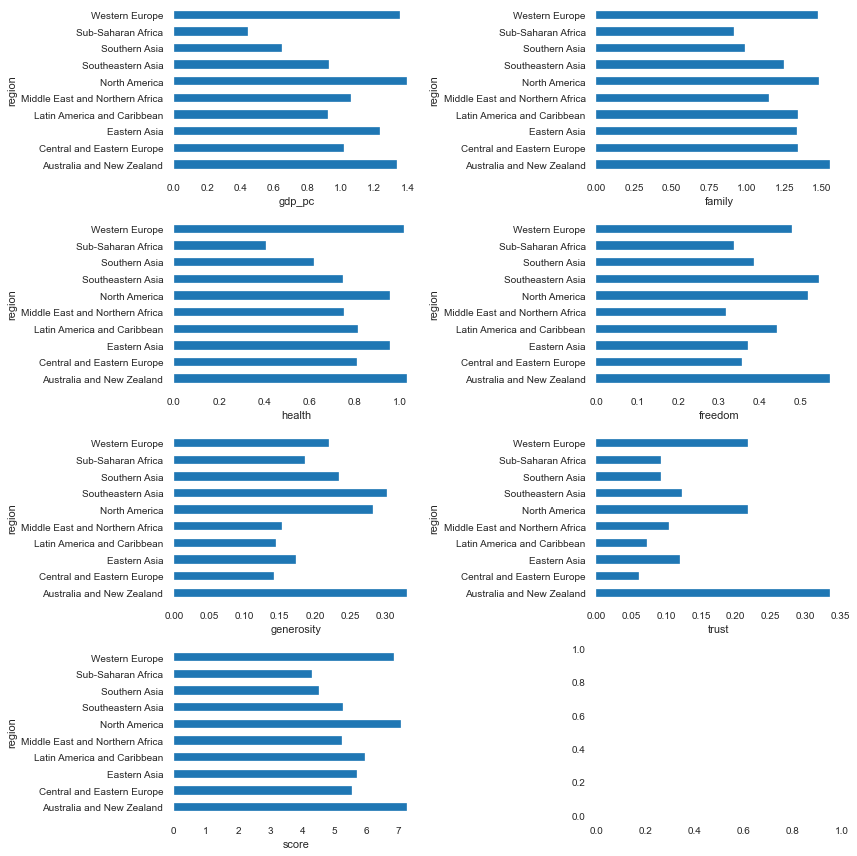

In [12]:
fig, axs = plt.subplots(4, 2, figsize=(12,12))
for i, ax in enumerate(axs.flat):
    try:
        df_means.loc[:, df_means.columns[i]].plot(kind='barh', ax=ax)
        ax.set(xlabel=df_means.columns[i])
    except:
        pass
fig.tight_layout()

[Text(0, 0, 'Southern Asia'),
 Text(0, 0, 'Central and Eastern Europe'),
 Text(0, 0, 'Middle East and Northern Africa'),
 Text(0, 0, 'Latin America and Caribbean'),
 Text(0, 0, 'Australia and New Zealand'),
 Text(0, 0, 'Western Europe'),
 Text(0, 0, 'Sub-Saharan Africa'),
 Text(0, 0, 'Southeastern Asia'),
 Text(0, 0, 'North America'),
 Text(0, 0, 'Eastern Asia')]

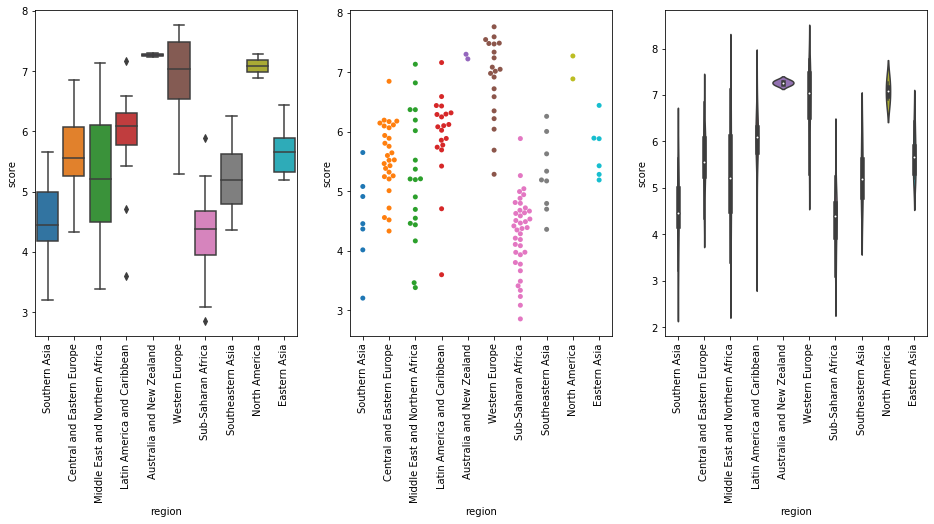

In [251]:
# plot univariate distrition for happiness score

fig, axes = plt.subplots(1, 3, figsize=(16,6))

ax = sns.boxplot(x="region", y="score", data=df_2019, ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.swarmplot(x="region", y="score", data=df_2019, ax=axes[1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.violinplot(x="region", y="score", data=df_2019, ax=axes[2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

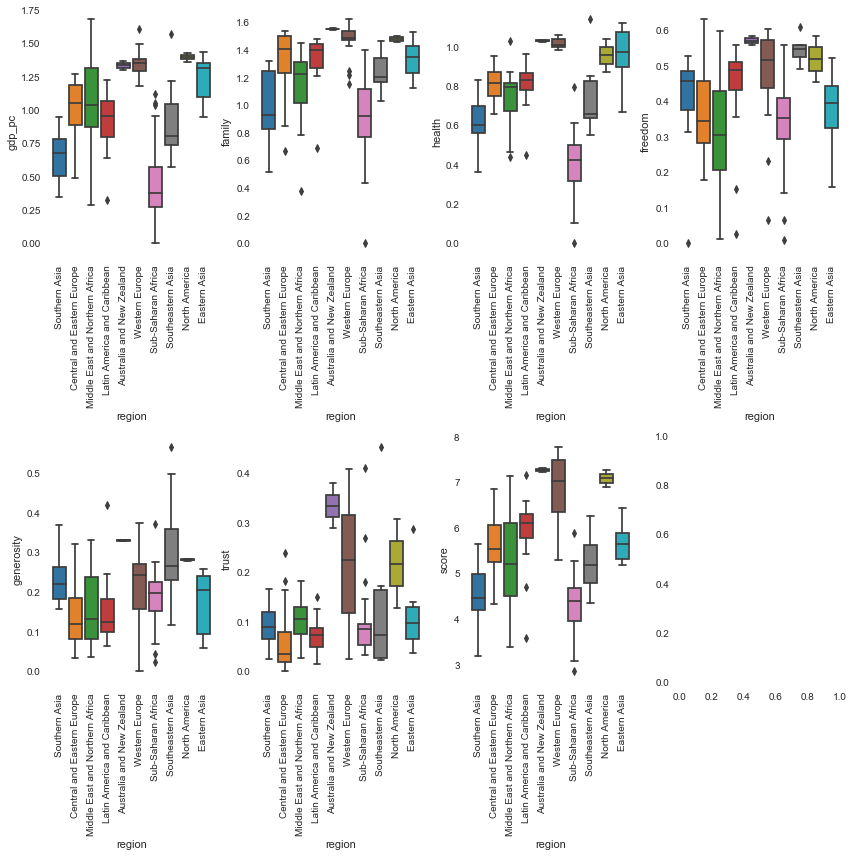

In [382]:
# plot boxplot for all variables

fig, axs = plt.subplots(2, 4, figsize=(12,12))
cols = features+targets
for i, ax in enumerate(axs.flat):
    try:
        ax = sns.boxplot(x='region', y=cols[i], data=df_2019, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    except:
        pass
fig.tight_layout()

### 6.  Assess the relationship between each variable and the target
### 7. Assess interactions between variables
We can generate both by viewing correlation matrix and pairwise scatterplot for all features and target.

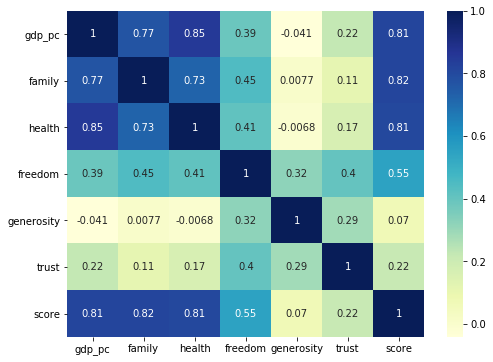

In [290]:
spearman_cormatrix = df_2019[features+targets].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(spearman_cormatrix, annot=True, cmap="YlGnBu")

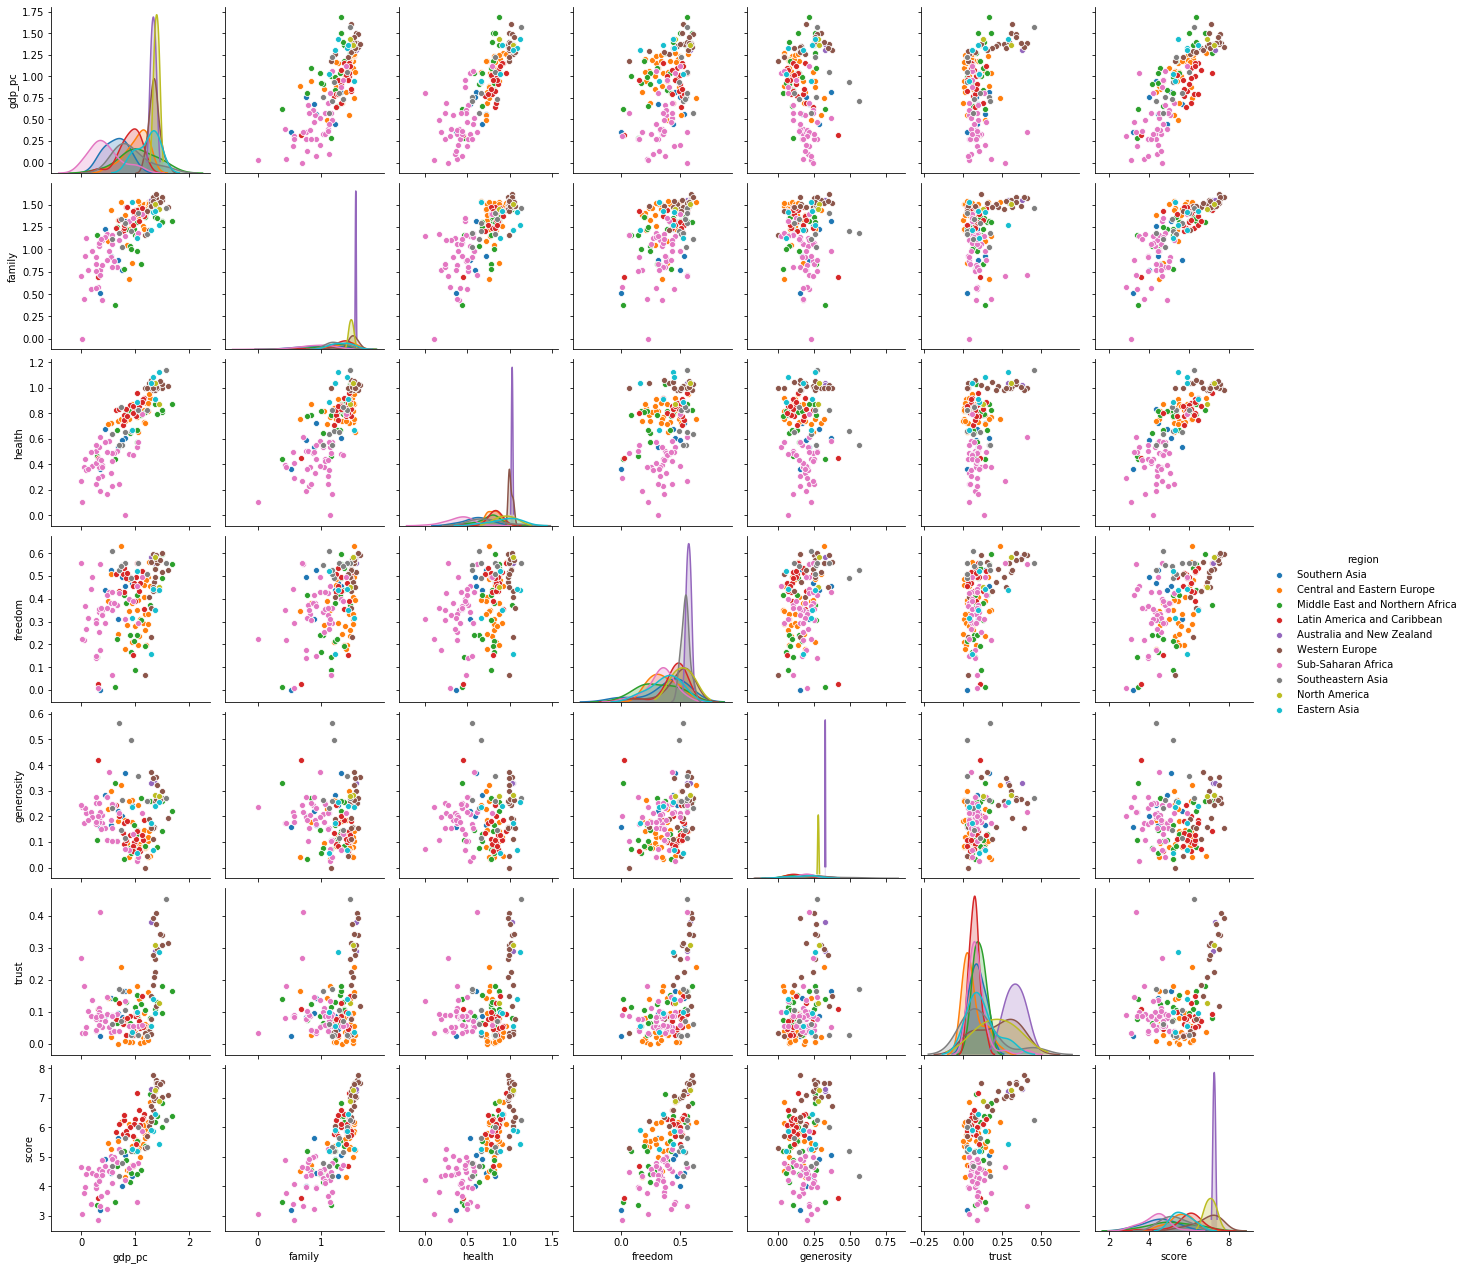

In [210]:
sns.pairplot(df_2019[features+targets+['region']], hue='region')

### 8. Explore data across many dimensions
For example, we can generate similar pairwise scatterplot by group by year.

From the plots below, we can see there seem to be shift in `Family` and `Health` over that years.

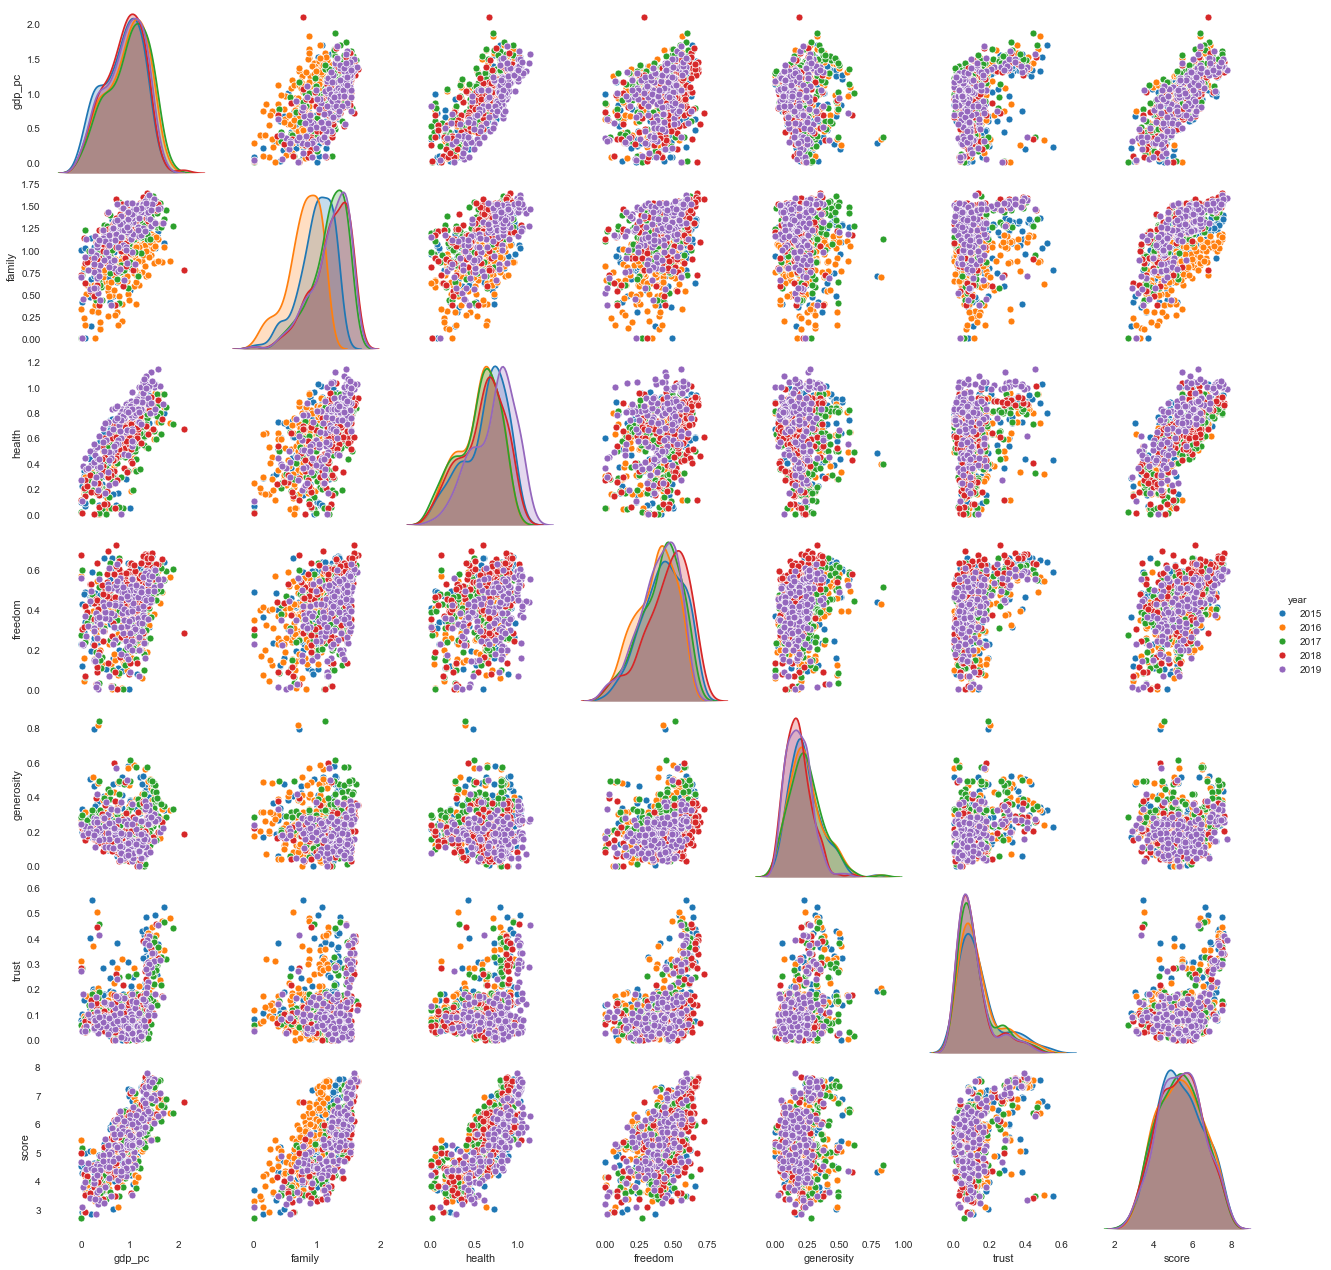

In [383]:
sns.pairplot(df_all_final[features+targets+['year']], hue='year')

### Question: Which countries changed the most in ranking in the past five years? What are the potential drivers for the change?

Country that dropped the most in happiness ranking: Venezuela, changed by -85
Country that increased the most in happiness ranking: Benin, changed by 53


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  2.,  2.,
         4., 13., 11., 16., 10., 33., 14., 14., 11.,  9.,  5.,  0.,  4.,
         8.,  1.,  1.,  2.]),
 array([-85. , -80.4, -75.8, -71.2, -66.6, -62. , -57.4, -52.8, -48.2,
        -43.6, -39. , -34.4, -29.8, -25.2, -20.6, -16. , -11.4,  -6.8,
         -2.2,   2.4,   7. ,  11.6,  16.2,  20.8,  25.4,  30. ,  34.6,
         39.2,  43.8,  48.4,  53. ]),
 <a list of 30 Patch objects>)

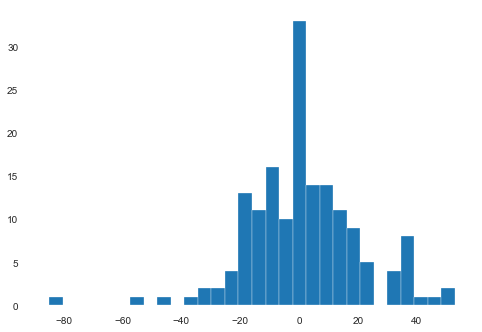

In [401]:
# get changes in rank

rank_change = pd.DataFrame(df_all_final.groupby('country_mapped')['rank'].nth(0) - df_all_final.groupby('country_mapped')['rank'].nth(-1))
print('Country that dropped the most in happiness ranking: {}, changed by {}'.format(rank_change.loc[rank_change['rank'].idxmin()].name,
                                                                                    rank_change.loc[rank_change['rank'].idxmin()].values[0]))
print('Country that increased the most in happiness ranking: {}, changed by {}'.format(rank_change.loc[rank_change['rank'].idxmax()].name,
                                                                                      rank_change.loc[rank_change['rank'].idxmax()].values[0]))
plt.hist(rank_change['rank'], bins=30)

score    0.0
Name: Djibouti, dtype: float64
score    2.103
Name: Venezuela, dtype: float64


(array([15., 14., 14., 25., 12., 13., 15., 10.,  8.,  5.,  1.,  7.,  7.,
         5.,  5.,  3.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([0.    , 0.0701, 0.1402, 0.2103, 0.2804, 0.3505, 0.4206, 0.4907,
        0.5608, 0.6309, 0.701 , 0.7711, 0.8412, 0.9113, 0.9814, 1.0515,
        1.1216, 1.1917, 1.2618, 1.3319, 1.402 , 1.4721, 1.5422, 1.6123,
        1.6824, 1.7525, 1.8226, 1.8927, 1.9628, 2.0329, 2.103 ]),
 <a list of 30 Patch objects>)

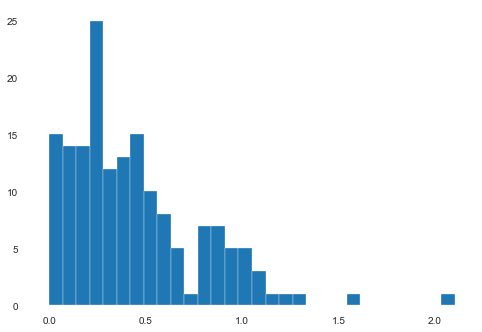

In [404]:
# get changes in scores

score_change = pd.DataFrame(df_all_final.groupby('country_mapped')['score'].max() - df_all_final.groupby('country_mapped')['score'].min())

print(score_change.loc[score_change['score'].idxmin()])
print(score_change.loc[score_change['score'].idxmax()])

plt.hist(score_change['score'], bins=30)


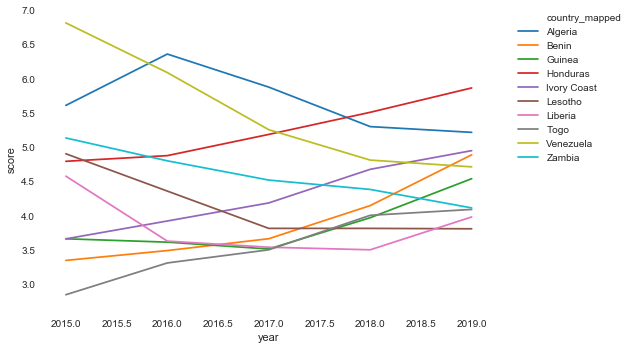

In [405]:
change_top_10 = score_change['score'].nlargest(10).index.values
change_top_10_df = df_all_final.loc[df_all_final['country_mapped'].isin(change_top_10)]
sns.lineplot(x='year', y='score', hue='country_mapped', data=change_top_10_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [30]:
# define a helper function for plotting

def plot_relationship(country, features, targets):
    country_df = df_all_final.loc[df_all_final['country_mapped']==country, features+targets]

    fig, axs = plt.subplots(1, 6, figsize=(12,4))
    for i, ax in enumerate(axs.flat):
        try:
            fig.suptitle(country)
            ax.scatter(country_df.loc[:, country_df.columns[i]], country_df.loc[:, 'score'])
            ax.set_xlabel(country_df.columns[i], labelpad = 5)
            ax.plot(np.unique(country_df.loc[:, country_df.columns[i]]), 
                 np.poly1d(np.polyfit(country_df.loc[:, country_df.columns[i]], country_df.loc[:, 'score'], 1))(np.unique(country_df.loc[:, country_df.columns[i]])))
        except:
            print('something went wrong')
            pass
    fig.tight_layout()

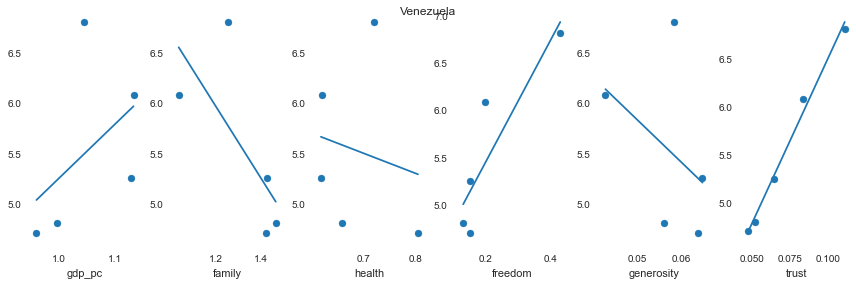

In [31]:
plot_relationship('Venezuela', features, targets)

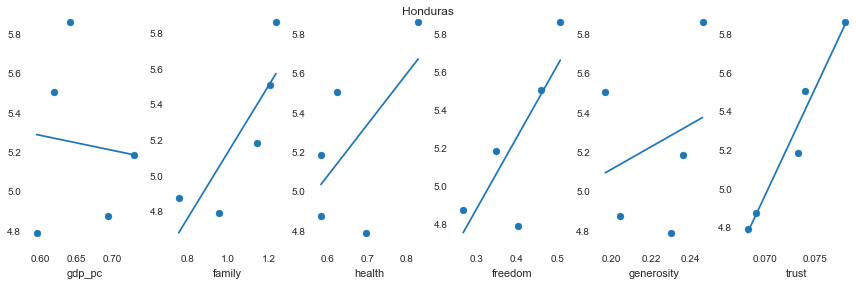

In [38]:
plot_relationship('Honduras', features, targets)

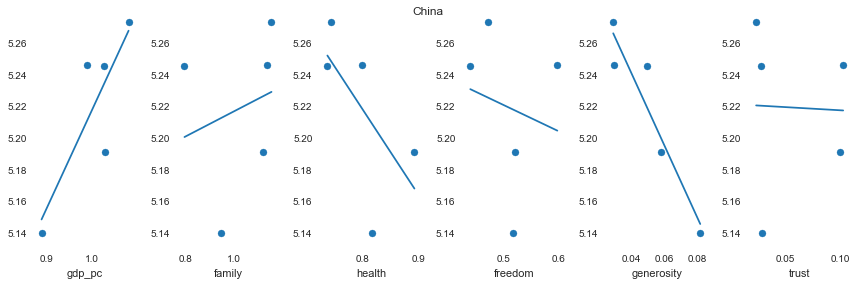

In [39]:
plot_relationship('China', features, targets)

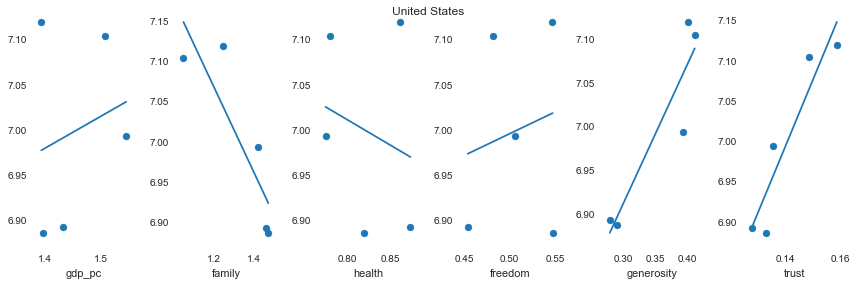

In [41]:
plot_relationship('United States', features, targets)